<a href="https://colab.research.google.com/github/BrianThomasRoss/Daily-Warm-Ups/blob/master/Probabilities_and_Statistics_Warm_Up.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Probabilities and Statistics Warm-Up
---
---
---

In the slack channel recruit a partner, you and your partner should work together from one of your own notebooks. When you're finished PR the completed warm up assignment into your partners repository.

## Concepts
----

Discuss, and answer, the following conceptual questions.

#### What is a normal distribution?

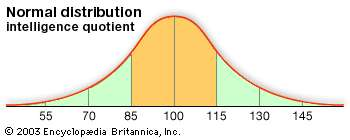

**Answer:**

#### What is the difference between descriptive and inferential statistics?

**Answer:**
<!-- Your answer in the following cell -->

Descriptive:

Inferential:

#### What is a null hypothesis?

**Answer:**

#### What is a t-test useful for?

**Answer:**

One sample: 

two sample:

#### When should you use a 1-tailed vs 2-tailed t-test?

**Answer:**

#### Propose 3 use cases where t-tests could be implemented.

**Answer:**

## Code
---

In [0]:
import numpy as np  #  linear algebra
import pandas as pd #  data manipulation
# pandas config
if pd:
    pd.set_option('display.max_rows', 500)
    pd.set_option('display.max_columns', 500)
    pd.set_option('display.width', 1000)
from scipy import stats #  statistics

#  visualizations
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
parties = ["republican", "democrat"]

issues = ["handicapped-infants",
          "water-project-cost-sharing",
          "adoption-of-the-budget-resolution",
          "physician-fee-freeze",
          "el-salvador-aid",
          "religious-groups-in-schools",
          "anti-satellite-test-ban",
          "aid-to-nicaraguan-contras",
          "mx-missile",
          "immigration",
          "synfuels-corporation-cutback", 
          "education-spending",
          "superfund-right-to-sue",
          "crime",
          "duty-free-exports", 
          "export-administration-act-south-africa", #  <-- While not required placing a comma here can be helpful when going back and ammending / adding to your code 
         ]

columns = ["party"] + issues

columns

['party',
 'handicapped-infants',
 'water-project-cost-sharing',
 'adoption-of-the-budget-resolution',
 'physician-fee-freeze',
 'el-salvador-aid',
 'religious-groups-in-schools',
 'anti-satellite-test-ban',
 'aid-to-nicaraguan-contras',
 'mx-missile',
 'immigration',
 'synfuels-corporation-cutback',
 'education-spending',
 'superfund-right-to-sue',
 'crime',
 'duty-free-exports',
 'export-administration-act-south-africa']

In [0]:
# Loading the data
uci = "https://archive.ics.uci.edu/ml/machine-learning-databases"
data = "/voting-records/house-votes-84.data"

df = # YOUR CODE HERE
df.head()

,party,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


In [0]:
# Replace the entries in the dataframe so y = 1 , n = 0 , and ? = np.NaN

df = # YOUR CODE HERE

df.head()

,party,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0


In [0]:
# Create seperate dataframes for republicans and democrats by slicing the above dataframe.

republicans = # YOUR CODE HERE
democrats = # YOUR CODE HERE

print(len(republicans), len(democrats))

168 267


In [0]:
# Define a function to compare the means between both parties

def compare_means(issues):
    """Compares the means of both parties for each issue"""
    for issue in issues:
        mean_dems = # YOUR CODE HERE
        mean_reps = # YOUR CODE HERE
        banner_length = "-"*len(issue)

        print(f"""
        Issue ({issue})
        -------{banner_length}-

          Democrat voting mean: {mean_dems:.05f}
        Republican voting mean: {mean_reps:.05f}
        """)

In [0]:
compare_means(issues=issues)

In [0]:
# Add the two sample t-test to the function

def compare_parties(issues):
    """Compares the means of both parties for each issue

    Returns
    -------

        Prints to stdout the mean support for each party on each issue and the
        results of 2 tailed t-test.    
    """
    for issue in issues:
        mean_dems = # YOUR CODE HERE
        mean_reps = # YOUR CODE HERE
        
        ttest_2samp = # YOUR CODE HERE
        
        sep = "--------" + "-"*len(issue)+"-"

        print(f"""
        Issue ({issue})
        {sep}

          Democrat voting mean: {mean_dems:.05f}
        Republican voting mean: {mean_reps:.05f}
                t-test results: {ttest_2samp}
        
        {sep}
        """)


In [0]:
compare_parties(issues=issues)